<a href="https://colab.research.google.com/github/sanjayaravinth721/Machine_learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20.0,10.0)

df=pd.read_csv('Headbrain.csv')
print(df.shape)
df.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
x=df['Head Size(cm^3)'].values
y=df['Brain Weight(grams)'].values

In [ ]:
#understanding of datas in linear_regression using (Y= MX + C)

#M=sum((x-`x)(y-`y))/sum((x-`x)^2)
#Y-Prediction
#X-Actual
#C-Intercept of y

In [ ]:
mean_x=np.mean(x)
mean_y=np.mean(y)

length_x= len(x)

numer=0
denom=0

for i in range(length_x):
  numer+=(x[i]-mean_x)*(y[i]-mean_y) #sum=sum+(x-`x)*(y-`y)
  denom+=(x[i]-mean_x)**2            #s=s+(x-`x)^2

m=numer/denom

c=mean_y-(m*mean_x)

#coefficients
print("m=",m,"c=",c)


m= 0.26342933948939945 c= 325.57342104944223


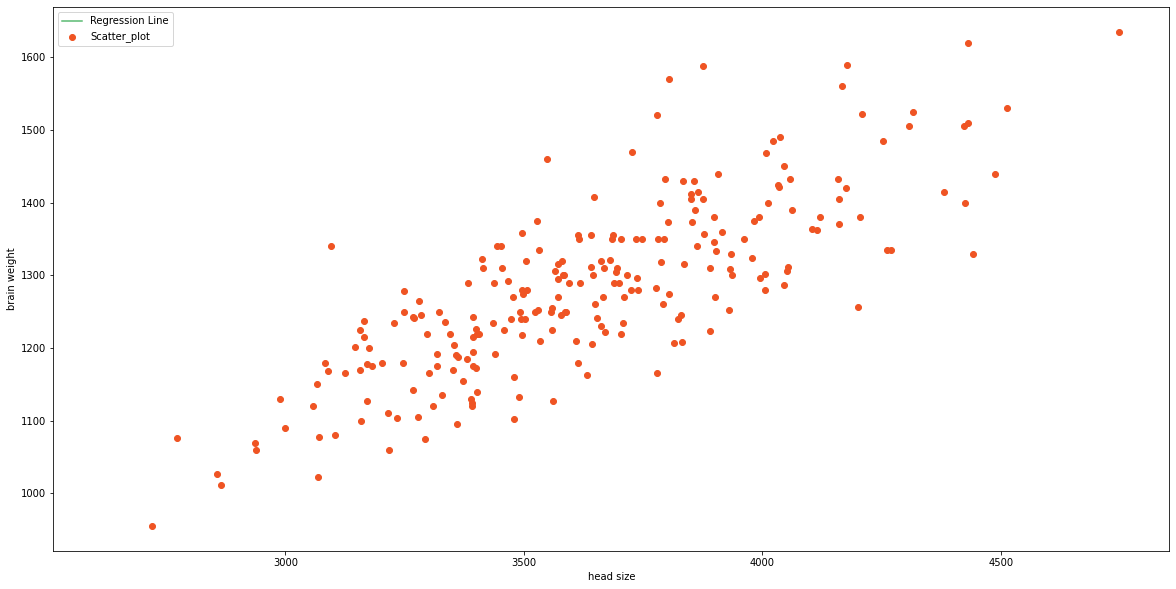

In [ ]:
max_x=np.max(x)+100
min_x=np.min(x)-100

X=np.linspace(min_x,min_x,1000)
Y=c + m*X   #Y=MX+C

#plotting_Line
plt.plot(X,Y,color='#58b970',label='Regression Line')

#plotting_Scatter_Points
plt.scatter(x,y,color='#ef5423',label='Scatter_plot')

plt.xlabel('head size')
plt.ylabel('brain weight')
plt.legend()
plt.show()

In [42]:
#Now using LinearRegression calculating r square

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=x.reshape((len(x),1))
regression=LinearRegression()
regression=regression.fit(x,y)
y_pred=regression.predict(x)

r2_score=regression.score(x,y)
print(r2_score)

0.639311719957


In [43]:
#calculating r square without LinearRegression
#r square is used calculate the distance 
#r_square=sum((y_pred-`y)^2)/sum((y-`y)^2)

sst=0
ssr=0
for i in range(len(x)):
  y_pred=m*x[i]+c
  sst+=(y_pred-mean_y)**2
  ssr+=(y[i]-mean_y)**2

r_sq=sst/ssr
print(r_sq)

[0.63931172]


**LOGISTIC REGRESSION**

In [44]:
import math
import seaborn as sns

In [45]:
#Collecting_data

titanic=pd.read_csv('Titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
print("No of passengers=",len(titanic))

No of passengers= 891


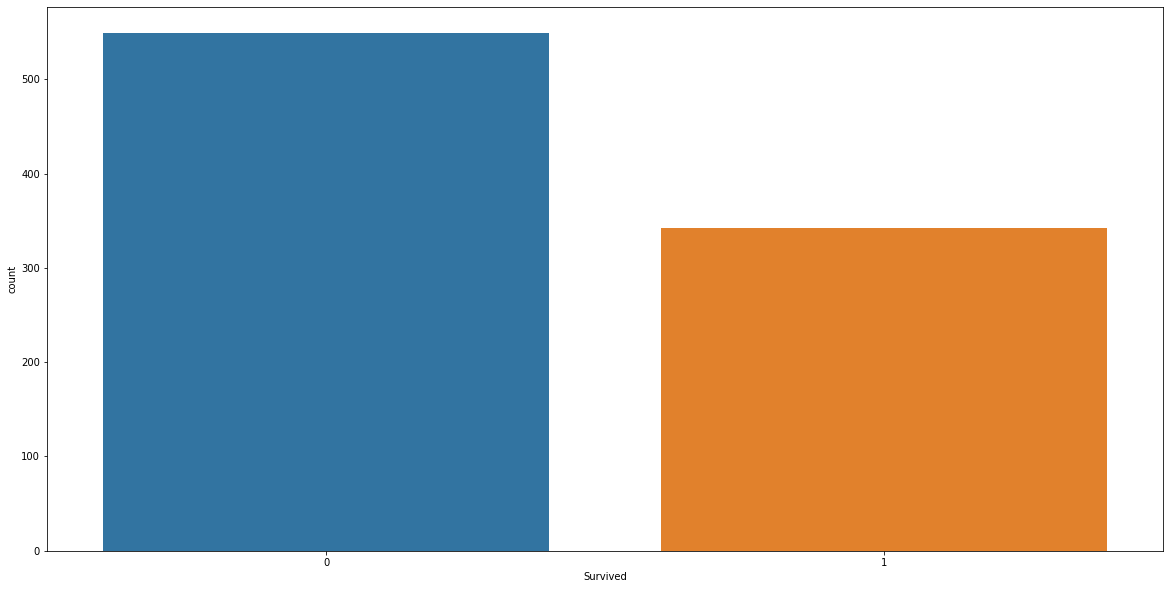

In [50]:
#Analysing_data
sns.countplot(x="Survived",data=titanic); #0 -> did not survived #1 -> survived

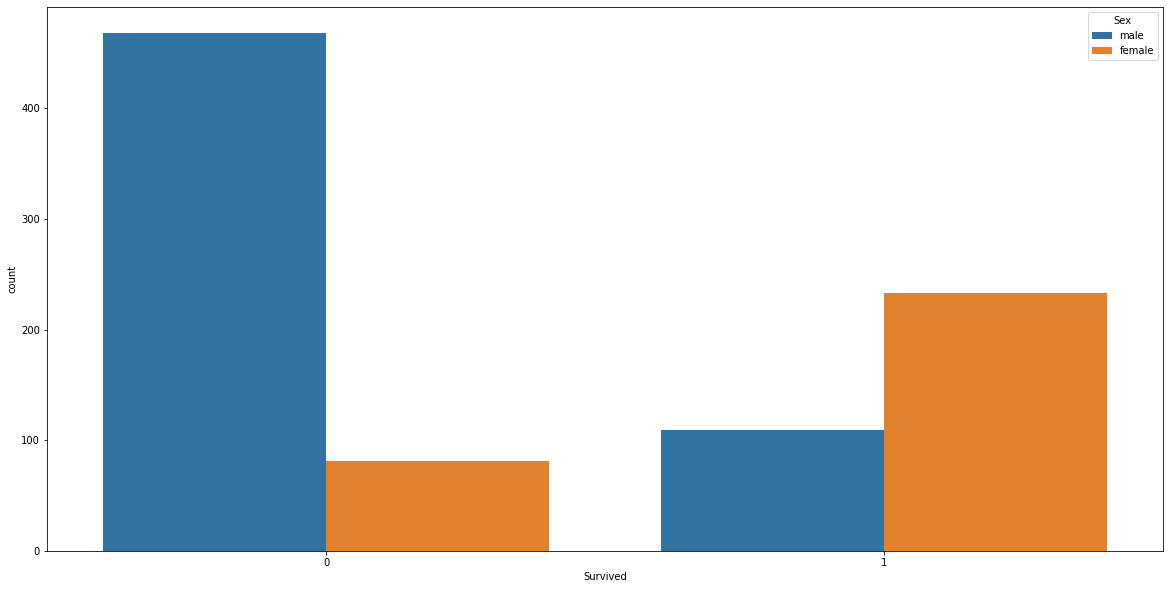

In [62]:
sns.countplot(x="Survived",hue="Sex",data=titanic);

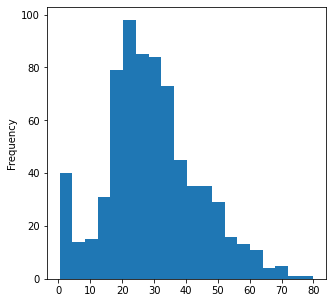

In [60]:
titanic["Age"].plot.hist(bins=20,figsize=(5,5))

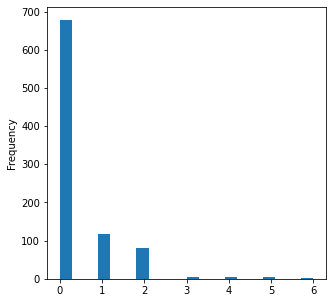

In [64]:
titanic["Parch"].plot.hist(bins=20,figsize=(5,5))

In [65]:
#Data_Wrangling

titanic.isnull() #true-null #false-not_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


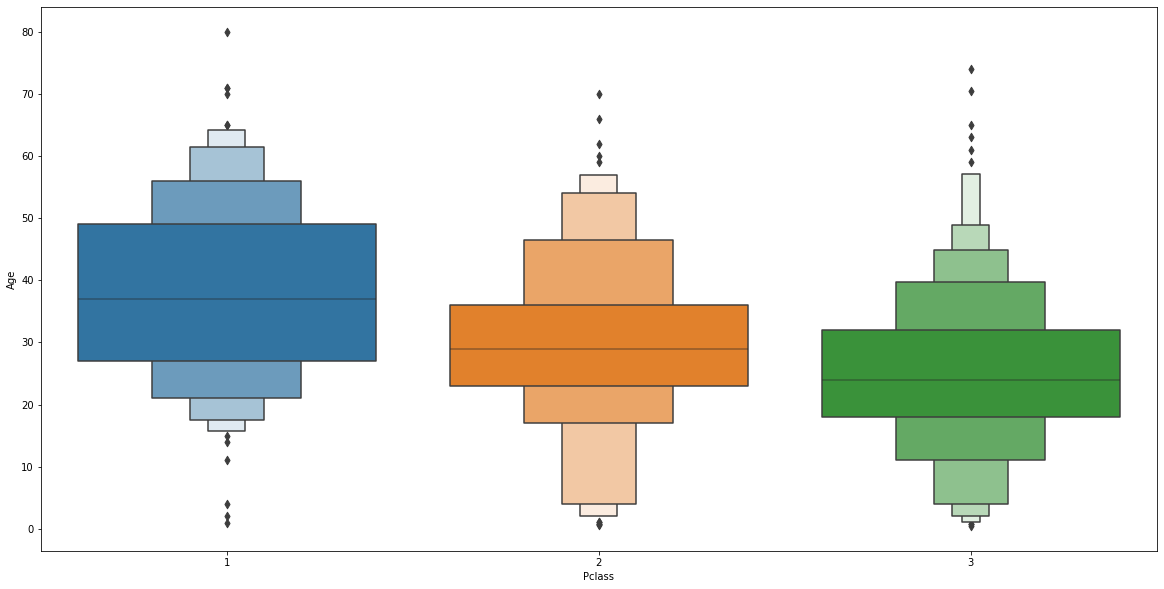

In [68]:
sns.boxenplot(x="Pclass",y="Age",data=titanic);  #1class=too_Old,2class=old,3class=young